Linear Regression Modeling using scikit learn in Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We are going to use real state data in order to predict the price of a house based on known features like no. of bedrooms, age, area, location, etc. "THIS IS AN ARTIFICIAL DATASET"

In [8]:
df = pd.read_csv('USA_Housing.csv')

In [9]:
df.head(5) #shows the first 5 rows of the data frame

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
df.columns #returns the list of columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
df.describe() #returns statistical information for each column if possible!

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


sns.pariplot(df[list of columns]) e.g. sns.pairplot(df[df.columns[:-2]]) this will drop the last 2 columns of the dataset for pair plotting however, if no. of columns are not many, df itself provides a good overal view of the data and correlation between fields

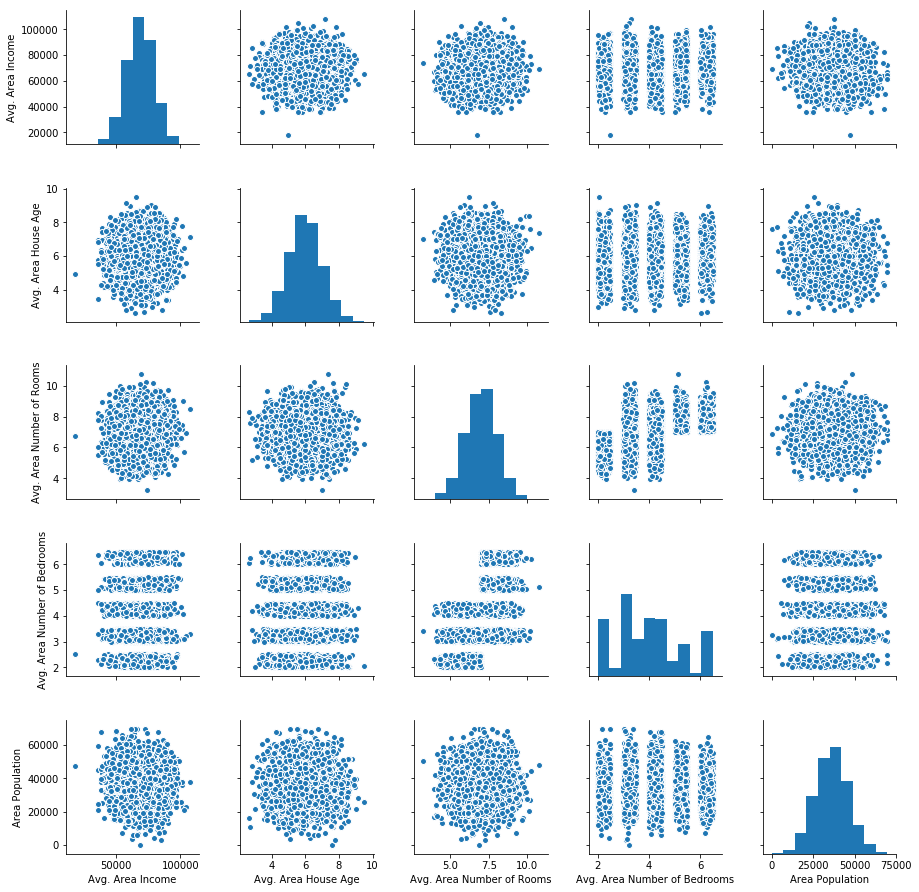

In [13]:
sns.pairplot(df) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


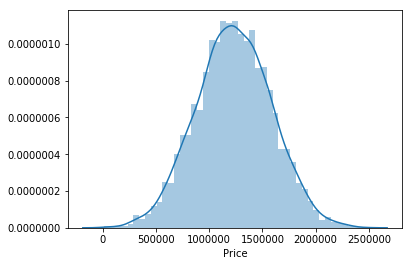

In [14]:
sns.distplot(df['Price']) # see how normalized the data is

In [15]:
df['Price'].mean() # also available using df.describe() method

1232072.65414236

In [17]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


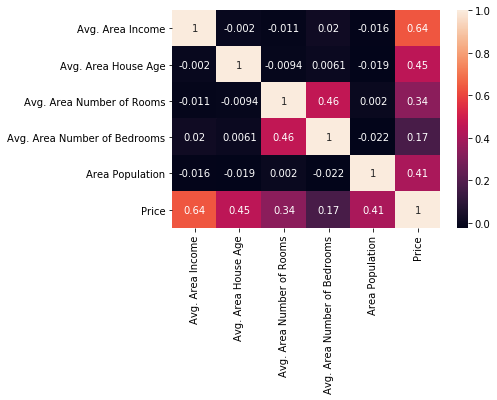

In [20]:
sns.heatmap(df.corr(), annot=True)

As you can see there is a fair correlation between average income of the houshold and the price of the house! no surprise though!

Now, we need to define our X and y vectors. X represent a matrix of feature vectors and y would be the label or house price

In [22]:
y = df['Price']
X = df.drop(['Price', 'Address'], axis=1)

At this step, we need to divide our dataset to train and then test our model

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

It is always good to see how train test split has been performed because we want good representation of data for both testing and training processes

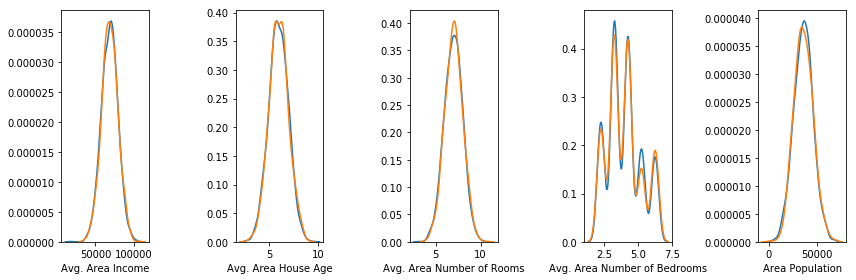

In [55]:
f, axes = plt.subplots (1, len(X.columns), figsize=(12, 4))
for ind, feature_name in enumerate(X.columns):
    sns.distplot(X_train[feature_name], hist=False, ax=axes[ind])
    sns.distplot(X_test[feature_name], hist=False, ax=axes[ind])
plt.tight_layout()

In [56]:
X_train.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4576,76027.944929,5.744456,8.032014,4.23,37462.222834
1088,60945.721799,4.781651,5.628335,3.08,34162.956731
479,71392.473885,3.997533,7.839552,4.26,36009.700337
727,69200.664269,5.609022,6.571302,4.28,31085.323040
3783,66631.108857,6.772022,6.923705,4.47,61361.730477


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression() #instantiate the model

In [59]:
lm.fit(X_train, y_train) # fit the model on X_train and y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
predictions = lm.predict(X_test) #price prediction on the test dataset

trendline eq:  
0.9952 x + 6234


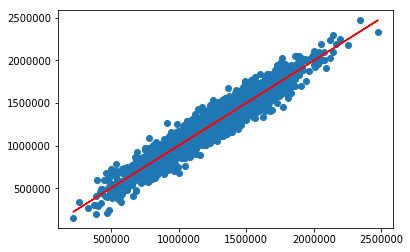

In [134]:
plt.scatter(predictions, y_test)
z = np.polyfit(predictions, y_test, 1)
p = np.poly1d(z)
plt.plot(predictions, p(predictions), 'r')
print('trendline eq:',p)

In [68]:
coef_df = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns= ['Coefficient'])

In [70]:
coef_df.apply(lambda x: round(x, 2))

,Coefficient
Avg. Area Income,21.57
Avg. Area House Age,166552.48
Avg. Area Number of Rooms,119512.53
Avg. Area Number of Bedrooms,2758.95
Area Population,15.30


Sklearn has some datasets like Boston or California_housing which are accessible through datasets module

In [71]:
from sklearn.datasets import california_housing

In [91]:
data = california_housing.fetch_california_housing()

In [98]:
calf_hous_df = pd.DataFrame(data= data.data, columns=data.feature_names)

In [104]:
%qtconsole

In [102]:
calf_hous_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


back to original dataset

In [107]:
residuals = predictions - y_test

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


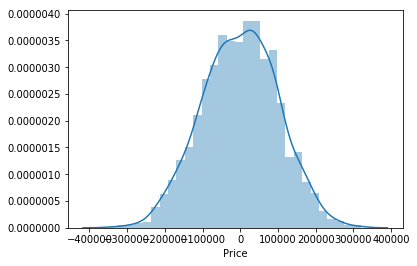

In [108]:
sns.distplot(residuals) # Normally distributed residuals imply a good model selection

## model evaluation

In [109]:
from sklearn.metrics import mean_absolute_error

In [111]:
err = mean_absolute_error(y_test, predictions)

In [112]:
err

81331.22699573742